# Arima

In this notebook we perform ARIMA on processed Bixi bike history data.

Required imports:

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Imports for time series

In [2]:
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

## Loading the Time-Series Data

Load the bixi trip history data and combine it into a single Pandas DataFrame.


In [3]:
station_bike_demand = pd.read_csv('data/mr_bike_demand.csv', index_col='start_date', parse_dates=['start_date']).asfreq('D')
display(station_bike_demand.head())

,trip_count
start_date,
2014-04-15,31
2014-04-16,67
2014-04-17,140
2014-04-18,108
2014-04-19,128


In [4]:
#infer the frequency of the data
station_bike_demand = station_bike_demand.asfreq(pd.infer_freq(station_bike_demand.index))

### Time frame:
Selecting data from the opening in 2014 to the end of 2019

In [5]:
start_date = datetime(2014, 1, 1)
end_date = datetime(2019, 10, 31)
lim_station_bike_demand = station_bike_demand[start_date:end_date]
display(lim_station_bike_demand)

,trip_count
start_date,
2014-04-15,31
2014-04-16,67
2014-04-17,140
2014-04-18,108
2014-04-19,128
...,...
2019-10-27,70
2019-10-28,173
2019-10-29,186


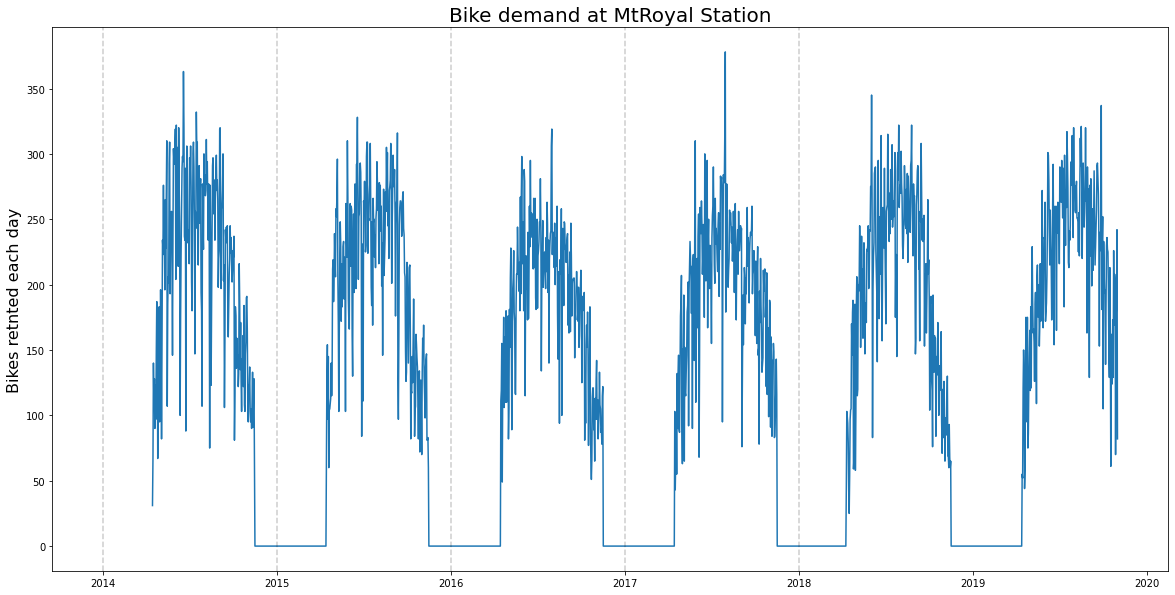

In [6]:
plt.figure(figsize=(20,10))
plt.plot(lim_station_bike_demand)
plt.title('Bike demand at MtRoyal Station', fontsize=20)
plt.ylabel('Bikes retnted each day', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Remove the trend

In [7]:
first_diff = lim_station_bike_demand.diff()[1:]

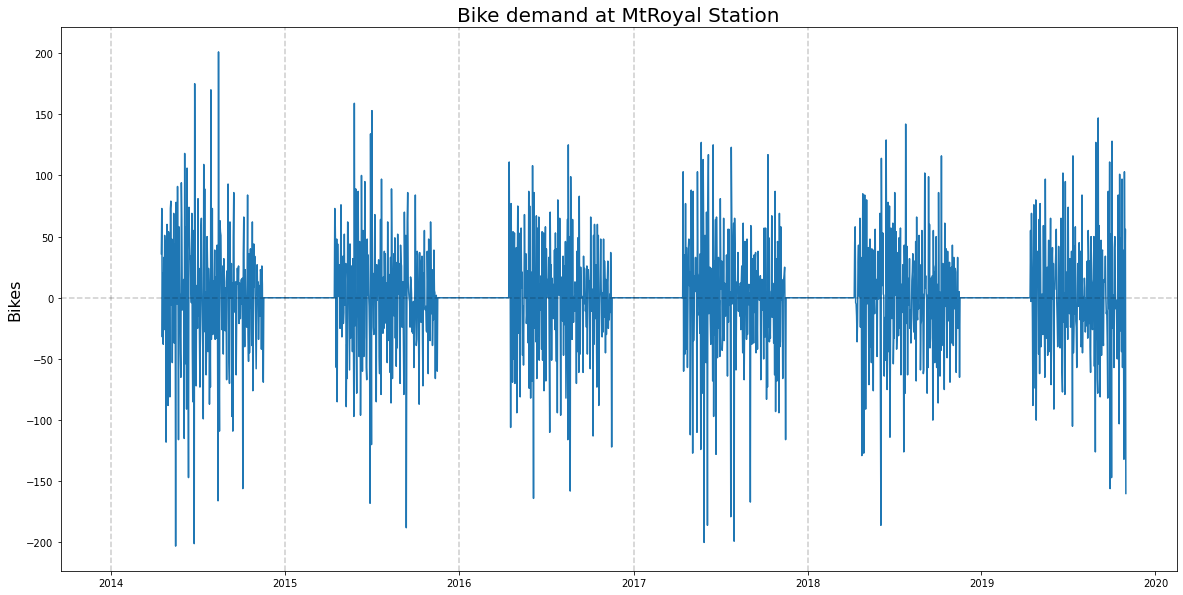

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(first_diff)
plt.title('Bike demand at MtRoyal Station', fontsize=20)
plt.ylabel('Bikes', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2);

## ACF

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


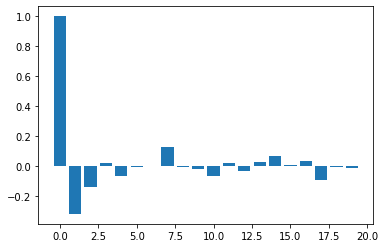

In [9]:
acf_vals = acf(first_diff, fft = False)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags]);

## PACF

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1022: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


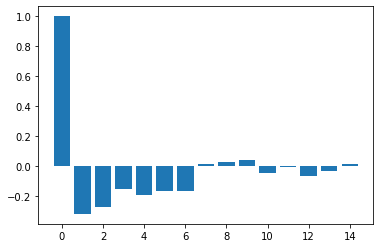

In [10]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags]);

## Get training and testing sets

In [11]:
# Train Data
train_end = datetime(2018, 11, 15)
train_data = lim_station_bike_demand[:train_end]

# Test Data
test_begin = datetime(2019, 4, 14)
test_end = datetime(2019, 10, 31)
test_data = lim_station_bike_demand[test_begin:test_end]
#display(train_data)
# test_data = lim_station_bike_demand[train_end + timedelta(days=1):test_end] #original

#### Plotting training data

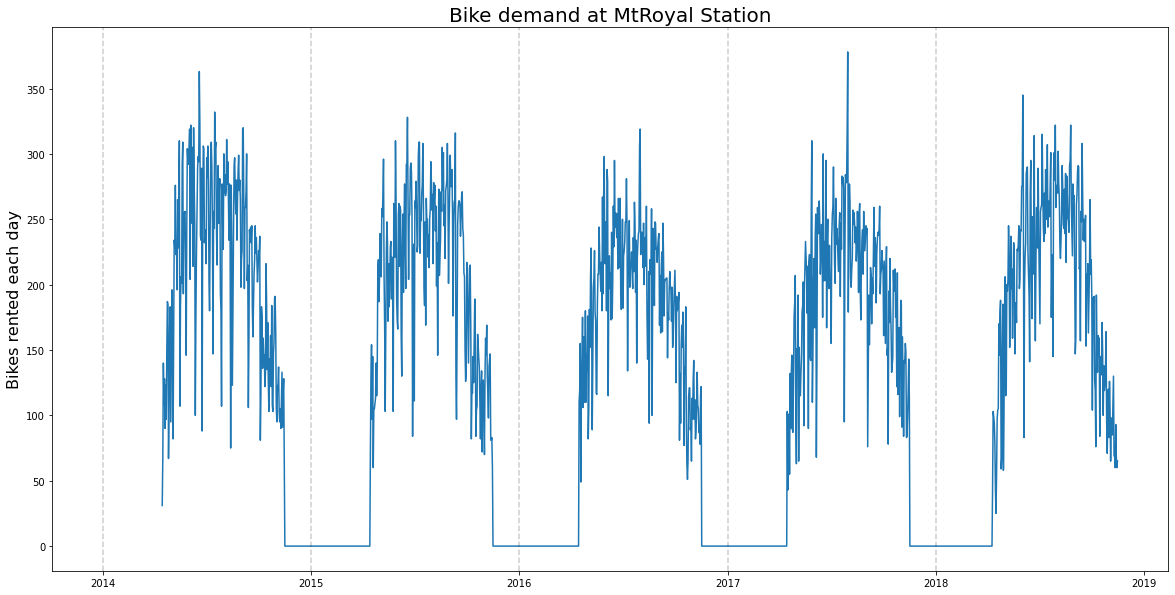

In [12]:
plt.figure(figsize=(20,10))
plt.plot(train_data)
plt.title('Bike demand at MtRoyal Station', fontsize=20)
plt.ylabel('Bikes rented each day', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

#### Plotting testing data

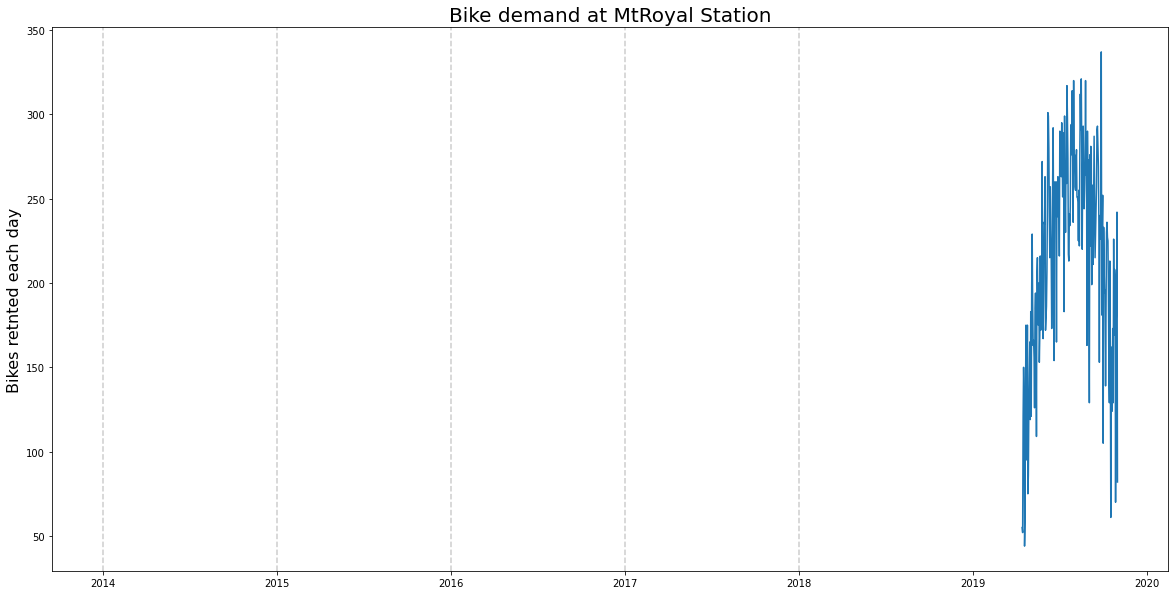

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(test_data)
plt.title('Bike demand at MtRoyal Station', fontsize=20)
plt.ylabel('Bikes retnted each day', fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Fit the SARIMA Model -------------------------- NEEDS TO BE FIXED

In [14]:
# SARIMA PARAMETERS:

# (p,d,q) # default is (1, 0, 0)

my_order = (0, 1, 0) # ---------------------------- PLS FIX

# PDQS where 

# P
# D
# Q

s = 365 # Seasonality
my_seasonal_order = (1, 0, 1, s) # ------------- PLS FIX

In [15]:
# Defining model
model = SARIMAX(train_data, order = my_order, seasonal_order = my_seasonal_order)

In [16]:
# Fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16246D+00    |proj g|=  1.21626D-01

At iterate    5    f=  5.14963D+00    |proj g|=  3.42085D-02

At iterate   10    f=  5.14727D+00    |proj g|=  2.35550D-03

At iterate   15    f=  5.14706D+00    |proj g|=  3.17468D-03

At iterate   20    f=  5.14702D+00    |proj g|=  7.91722D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   7.917D-07   5.147D+00
  F =   5.1470237295844363     

CONVERG

In [17]:
# Summary of the model
print(model_fit.summary())

                                       SARIMAX Results                                       
Dep. Variable:                            trip_count   No. Observations:                 1676
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 365)   Log Likelihood               -8626.412
Date:                               Fri, 26 Nov 2021   AIC                          17258.824
Time:                                       22:54:15   BIC                          17275.094
Sample:                                   04-15-2014   HQIC                         17264.852
                                        - 11-15-2018                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L365     -0.6759      0.437     -1.546      0.122      -1.533       0.181
ma.S.L365  

### Predictions

In [19]:
# Get predictions and residuals
# predictions = model_fit.forecast(len(test_data))
predictions = model_fit.forecast('2019-10-31')

print("len(test_data)): "+str(len(test_data)))
print("len(test_data.index): "+str(len(test_data.index)))

predictions = pd.Series(predictions, index=test_data.index)
#pd.set_option('display.max_rows', None)
display(predictions)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


len(test_data)): 201
len(test_data.index): 201


start_date
2019-04-14    65.950756
2019-04-15    63.391465
2019-04-16    64.917661
2019-04-17    66.620774
2019-04-18    64.737918
                ...    
2019-10-27    65.438724
2019-10-28    63.697378
2019-10-29    65.904468
2019-10-30    66.600138
2019-10-31    63.541346
Freq: D, Name: predicted_mean, Length: 201, dtype: float64

### Residuals:

In [32]:
residuals = test_data['trip_count'] - predictions
display(residuals)


start_date
2019-04-14    -10.950756
2019-04-15    -11.391465
2019-04-16     56.082339
2019-04-17     83.379226
2019-04-18     67.262082
                 ...    
2019-10-27      4.561276
2019-10-28    109.302622
2019-10-29    120.095532
2019-10-30    175.399862
2019-10-31     18.458654
Freq: D, Length: 201, dtype: float64

### Plot prediction:

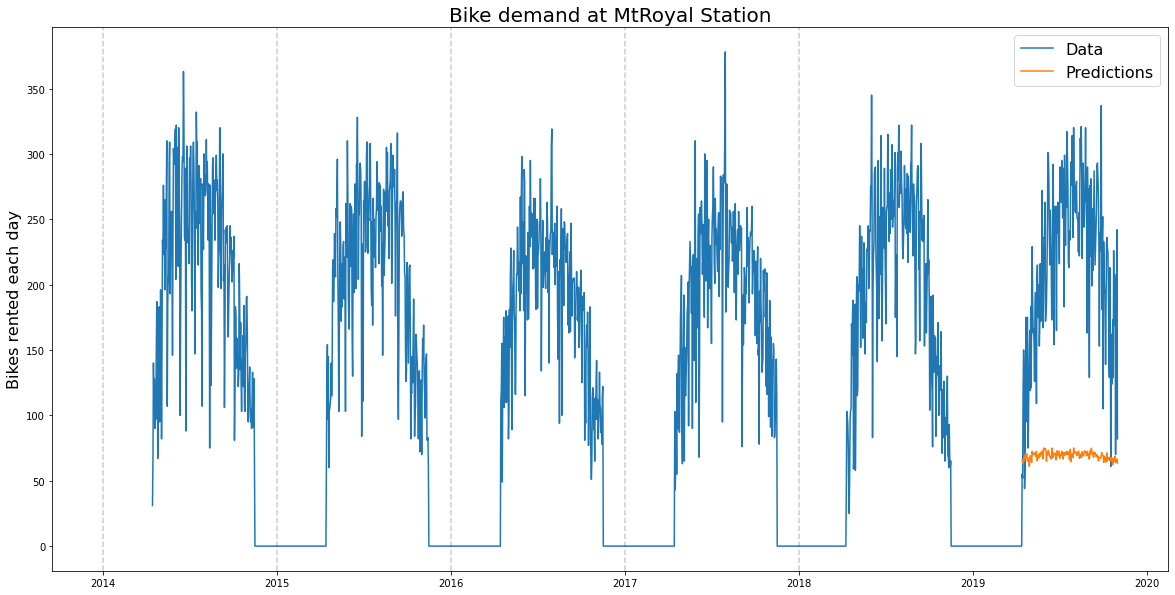

In [33]:
plt.figure(figsize=(20, 10))

plt.plot(lim_station_bike_demand)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Bike demand at MtRoyal Station', fontsize=20)
plt.ylabel('Bikes rented each day', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)